In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_excel('iris.xls')

In [6]:
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df.shape

(150, 5)

In [8]:
df.index

RangeIndex(start=0, stop=150, step=1)

In [9]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [13]:
df.nunique()

SL                35
SW                23
PL                43
PW                22
Classification     3
dtype: int64

In [14]:
df['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

### Preprocessing steps

In [15]:
!pip install missingno

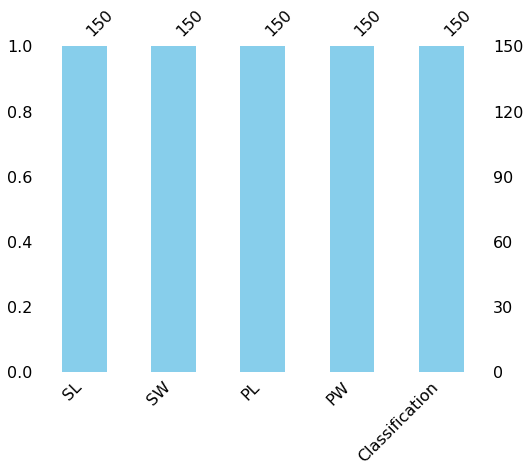

In [23]:
#checking null values
import missingno as msno
msno.bar(df,figsize=(8,6),color='skyblue')
plt.show()

### Repalcing null values

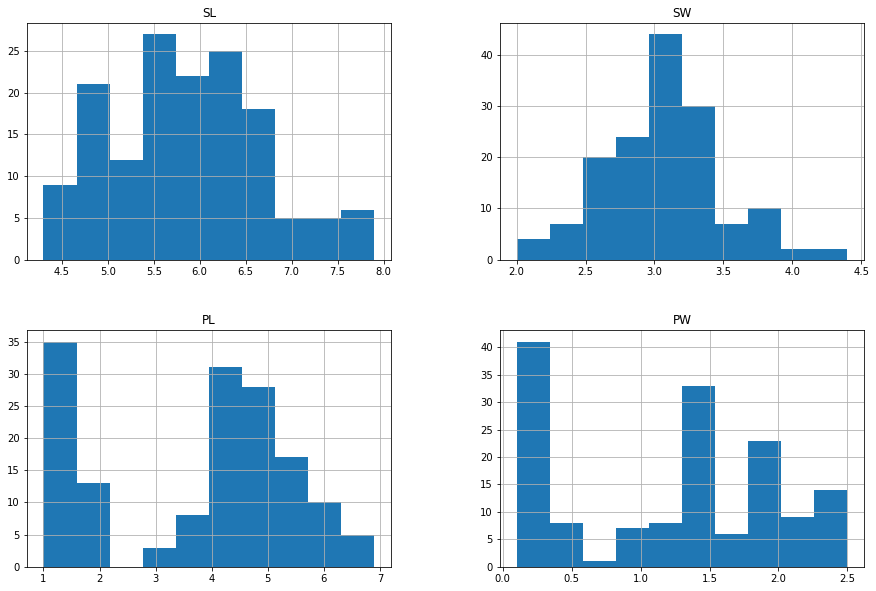

In [24]:
freqgraph=df.select_dtypes(include=["float64"])
freqgraph.hist(figsize=(15,10))
plt.show()

In [25]:
# replacing null values by median
df['SL'].fillna((df['SL'].median()),inplace=True)
df['SW'].fillna((df['SW'].median()),inplace=True)
df['PL'].fillna((df['PL'].median()),inplace=True)

In [26]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

<AxesSubplot:>

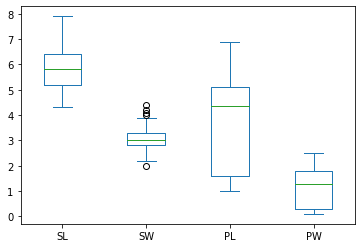

In [27]:
#to check the outliers
df.plot(kind = 'box')

From this we can see outliers present in SW.

In [28]:
#removing the outliers
Q1= np.percentile(df.SW, 25)
Q2=np.percentile(df.SW, 50)
Q3=np.percentile(df.SW, 75)
print(Q1,Q2,Q3)

2.8 3.0 3.275


In [29]:
IQR=Q3-Q1
IQR

0.4750000000000001

In [30]:
Low_lim=Q1-1.5*IQR
Up_lim=Q3+1.5*IQR
print(Low_lim,Up_lim)

2.0874999999999995 3.9875


In [31]:
Outlier=[]
for x in df['SW']:
    if((x>Up_lim) or (x<Low_lim)):
        Outlier.append(x)

In [32]:
Outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [33]:
ind1=df['SW']>Up_lim
df.drop(df.loc[ind1].index,inplace=True)

In [34]:
ind2=df['SW']<Low_lim
df.drop(df.loc[ind2].index,inplace=True)

Text(0.5, 1.0, 'SW')

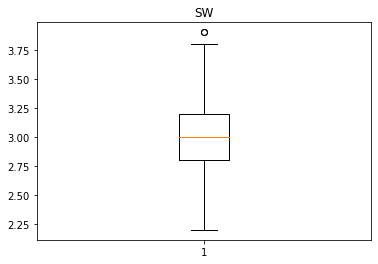

In [35]:
plt.boxplot(df['SW'])
plt.title('SW')

In [38]:
#scaling
from sklearn import preprocessing
x=df.drop('Classification',axis=1)
x.describe()

,SL,SW,PL,PW
count,145.000000,145.000000,145.000000,145.000000
mean,5.867586,3.023448,3.847586,1.226897
std,0.816827,0.374354,1.712265,0.758219
min,4.300000,2.200000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.200000,5.100000,1.800000
max,7.900000,3.900000,6.900000,2.500000


In [39]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
x=min_max.fit_transform(x)
x=pd.DataFrame(x)

In [40]:
x.describe()

,0,1,2,3
count,145.000000,145.000000,145.000000,145.000000
mean,0.435441,0.484381,0.482642,0.469540
std,0.226896,0.220208,0.290214,0.315925
min,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.352941,0.101695,0.083333
50%,0.416667,0.470588,0.567797,0.500000
75%,0.583333,0.588235,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

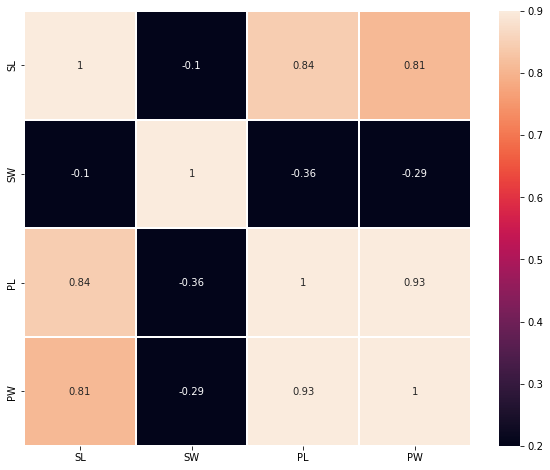

In [41]:
#Feature Reduction
corr=df.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corr,vmin=0.2,vmax=0.9,annot=True,linewidth=0.2)

Since the dataset having less no.of columns,feature reduction is not required.

### Label encoding

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Classification']=le.fit_transform(df['Classification'])
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [43]:
df.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2
149,5.9,3.0,5.10,1.8,2


# Model building

In [44]:
from sklearn.model_selection import train_test_split
x=df.drop(['Classification'],axis=1)
y=df['Classification']
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=0.2)

In [45]:
x_train.shape

(116, 4)

In [46]:
y_train.shape

(116,)

In [47]:
x_test.shape

(29, 4)

In [48]:
y_test.shape

(29,)

### 1) Logistic Regression¶

In [49]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [50]:
import warnings
warnings.filterwarnings("ignore")

In [53]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [54]:
from sklearn.metrics import f1_score,accuracy_score, precision_score, recall_score,confusion_matrix
accuracy = accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')

In [56]:
print('accuracy_Logistic Regression : %.3f' %accuracy)
print('precision_Logistic Regression : %.3f' %precision)
print('recall_Logistic Regression: %.3f' %recall)
print('f1-score_Logistic Regression : %.3f' %f1)

accuracy_Logistic Regression : 0.931
precision_Logistic Regression : 0.931
recall_Logistic Regression: 0.931
f1-score_Logistic Regression : 0.931


In [61]:
confusion_matrix(y_test,y_pred)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

### 2)KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors= np.arange(3,15)
for k in neighbors:
    classifier= KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    knn_model= classifier.fit(x_train,y_train)
    y_predict= knn_model.predict(x_test)
    acc= accuracy_score(y_test,y_predict)
    acc_values.append(acc)

In [63]:
acc_values

[0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.896551724137931,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.8620689655172413]

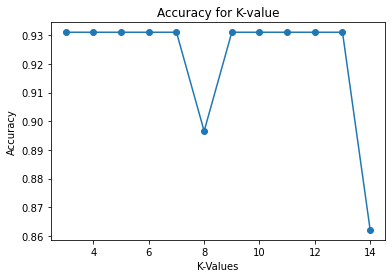

In [64]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('K-Values')
plt.ylabel('Accuracy')
plt.title('Accuracy for K-value')
plt.show()

### RandomForest

In [75]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred1=rf.predict(x_test)

In [77]:
cm = confusion_matrix(y_test,pred1)
accuracy = accuracy_score(y_test,pred1)
precision =precision_score(y_test,pred1,average='micro')
recall =  recall_score(y_test,pred1,average='micro')
f1 = f1_score(y_test,pred1,average='micro')

In [78]:
print('Confusion matrix for Random Forest\n',cm)
print('accuracy_random_Forest : %.3f' %accuracy)
print('precision_random_Forest : %.3f' %precision)
print('recall_random_Forest : %.3f' %recall)
print('f1-score_random_Forest : %.3f' %f1)

Confusion matrix for Random Forest
 [[ 9  0  0]
 [ 0  8  1]
 [ 0  1 10]]
accuracy_random_Forest : 0.931
precision_random_Forest : 0.931
recall_random_Forest : 0.931
f1-score_random_Forest : 0.931


### Decision tree

In [79]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_model= dt.fit(x_train,y_train)
pred2= dt_model.predict(x_test)

In [80]:
cm = confusion_matrix(y_test,pred2)
accuracy = accuracy_score(y_test,pred2)
precision =precision_score(y_test,pred2,average='micro')
recall =  recall_score(y_test,pred2,average='micro')
f1 = f1_score(y_test,pred2,average='micro')

In [81]:
print('Confusion matrix for DecisionTree\n',cm)
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.3f' %precision)
print('recall_DecisionTree: %.3f' %recall)
print('f1-score_DecisionTree : %.3f' %f1)

Confusion matrix for DecisionTree
 [[9 0 0]
 [0 8 1]
 [0 2 9]]
accuracy_DecisionTree: 0.897
precision_DecisionTree: 0.897
recall_DecisionTree: 0.897
f1-score_DecisionTree : 0.897


### SVM

In [82]:
from sklearn.svm import SVC
svm_linear = SVC(kernel="linear")
svm_linear.fit(x_train, y_train)
pred3=svm_linear.predict(x_test)

In [83]:
cm = confusion_matrix(y_test,pred3)
accuracy = accuracy_score(y_test,pred3)
precision =precision_score(y_test,pred3,average='micro')
recall =  recall_score(y_test,pred3,average='micro')
f1 = f1_score(y_test,pred3,average='micro')

In [84]:
print('Confusion matrix for SVC\n',cm)
print('accuracy_SVC: %.3f' %accuracy)
print('precision_SVC: %.3f' %precision)
print('recall_SVC: %.3f' %recall)
print('f1-score_SVC : %.3f' %f1)

Confusion matrix for SVC
 [[9 0 0]
 [0 8 1]
 [0 2 9]]
accuracy_SVC: 0.897
precision_SVC: 0.897
recall_SVC: 0.897
f1-score_SVC : 0.897


In [ ]:
According to the above models KNN,Logistic Regression and Randomforest are the suitable models for this dataset